In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x=data.drop('label',axis=1)
y=data.label
print(x.shape)
print(y.shape)


(42000, 784)
(42000,)


In [4]:
x=np.array(x/255.0)
print(x[0].shape)
x=x.reshape(-1,28,28,1)

(784,)


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)


In [6]:
model = Sequential()
# CNN 1
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',input_shape=(257,)))
model.add(Dropout(0.5))

# Output
model.add(Dense(10, activation="softmax"))

# Final model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

2023-01-03 12:12:16.359535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:12:16.454694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:12:16.455539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:12:16.457011: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
import keras
file_path = "weights_best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor="val_accuracy", save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.9, patience=2, min_lr=1e-6, mode="max", verbose=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, mode="max", verbose=True)
callbacks_list = [checkpoint, reduce_lr, early_stopping]

2023-01-03 12:12:19.409689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-03 12:12:20.719268: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


269/269 [==============================] - 8s 5ms/step - loss: 0.5292 - accuracy: 0.8282 - val_loss: 0.1247 - val_accuracy: 0.9622
Epoch 2/100
269/269 [==============================] - 1s 4ms/step - loss: 0.1622 - accuracy: 0.9511 - val_loss: 0.0828 - val_accuracy: 0.9746
Epoch 3/100
269/269 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9633 - val_loss: 0.0672 - val_accuracy: 0.9771
Epoch 4/100
269/269 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9686 - val_loss: 0.0546 - val_accuracy: 0.9824
Epoch 5/100
269/269 [==============================] - 1s 5ms/step - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 6/100
269/269 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0457 - val_accuracy: 0.9851
Epoch 7/100
269/269 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9769 - val_loss: 0.0464 - val_accuracy: 0.9850
Epoch 8/100

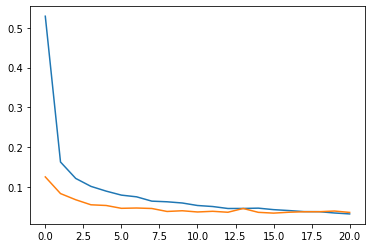

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=True,validation_split=0.2,callbacks=callbacks_list)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
from tensorflow import keras
model = keras.models.load_model('/kaggle/working/weights_best.hdf5')

In [10]:
score=model.evaluate(x_test,y_test)
print(score[0])
print(score[1])

263/263 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9908
0.035404521971940994
0.9908333420753479


In [11]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
print(len(test))
test.head()
test=np.array(test/255.0)
test=test.reshape(-1,28,28,1)

28000


In [12]:
pre=model.predict(test)
pre[0:5]

array([[2.49875121e-09, 5.33165734e-10, 9.99999404e-01, 4.63649656e-07,
        9.66598242e-12, 2.81060948e-14, 2.84963958e-12, 7.15304367e-08,
        2.56406452e-09, 7.60189897e-11],
       [9.99997020e-01, 1.05035880e-12, 2.45084530e-09, 6.47535414e-10,
        1.12441986e-10, 1.36658784e-07, 1.48675610e-06, 1.40170386e-07,
        5.54266499e-08, 1.10175620e-06],
       [5.51558313e-11, 2.22586435e-10, 8.08772569e-08, 1.45238616e-07,
        2.32088241e-05, 1.50614827e-08, 1.31219645e-11, 8.36985407e-07,
        3.84245914e-06, 9.99971867e-01],
       [8.55690613e-03, 1.19359127e-08, 8.60830696e-05, 2.90225325e-05,
        7.24804659e-06, 1.42338899e-06, 3.77227684e-06, 7.74250180e-03,
        8.70986187e-05, 9.83485937e-01],
       [1.09710692e-10, 2.96787078e-07, 3.14579265e-05, 9.99967337e-01,
        7.44151407e-11, 2.59386423e-09, 7.99351280e-11, 5.43065646e-08,
        8.25824998e-07, 8.22626234e-08]], dtype=float32)

In [13]:
label=np.argmax(pre,axis=1)
print(label)

[2 0 9 ... 3 9 2]


In [14]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': label})
submission.to_csv('/kaggle/working/submission.csv', index=False)